In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler


# 3. Pair Programming Ajuste

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:

Realizar el ajuste o ajustes de los modelos

Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [2]:
df = pd.read_pickle('datos/Invistico_Airline_v4_enco.pkl')
df.head(2)

,satisfaction,Gender,Customer Type,Type of Travel,Class,Seat comfort,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Online boarding,Age,Flight Distance,Departure Delay in Minutes,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,Departure/Arrival time convenient_4,Departure/Arrival time convenient_5
0,0,1.000,1.0,1.282,2.085,0.006,1.002,1.217,1.504,1.000,...,2.679,1.691495,-1.671090,-0.386036,1.0,0.0,0.0,0.0,0.0,0.0
1,0,1.606,1.0,1.282,1.000,0.006,1.002,1.558,1.674,2.962,...,2.679,0.500825,0.470348,7.786328,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# separamos los datos en X (variables predictoras) e y (variable respuesta)

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [4]:
# separamos los datos en los grupos de entrenamiento y prueba

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 37)

In [5]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train, y_train)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test)

In [6]:
# creamos un dataframe de los resultados

train_df_esta = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train)})
test_df_esta  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
9517,1,1,Train
117907,0,0,Train
96597,0,0,Train
64932,0,0,Train
99051,0,0,Train


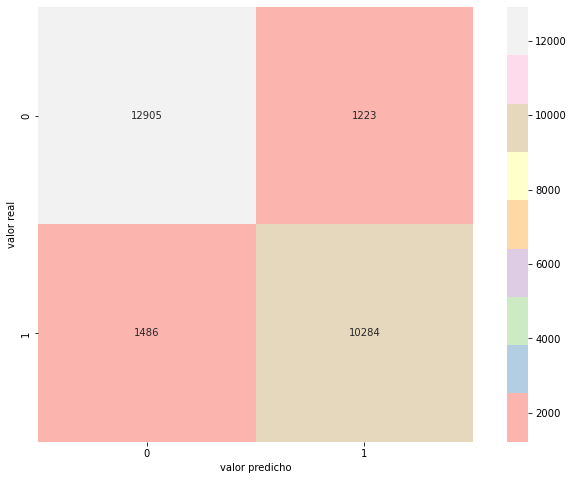

In [7]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y  ESTANDARIZADOS

mat_lr = confusion_matrix(y_test, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr, square=True, annot=True, fmt="d", cmap="Pastel1")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

En la matriz de confusion podemos ver que tenemos 1225 falsos positivos y 1490 falsos negativos.

En nuestro caso como hemos asignado un encoding de '1' a la categoría 'insatisfecho' y '0' a 'satisfecho', los falsos positivos son los clientes predichos como insatisfechos cuando no lo eran. Los falsos negativos al contrario son los que se han predicho como insatisfechos cuando en realidad eran satisfechos.

# 4. Pair Programming Métricas

En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:

Calculad las métricas para vuestro modelo

Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?

In [8]:
# usamos esta funcion que crea un dataframe de las metricas de regresion logistica

def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kappa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [9]:
# aplicamos la funcion a nuestros valores predichos

resultados_metricas = metricas(y_test, y_pred_test_esta, y_train, y_pred_train_esta, "Regresión logistica")
resultados_metricas

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.895397,0.893717,0.873747,0.883619,0.788652,test,Regresión logistica
1,0.896968,0.892315,0.878083,0.885141,0.791739,train,Regresión logistica


Cuando examinamos los resultados del train y test de este primer modelo podemos ver que tenemos unas métricas bastante buenas. El kappa de 0,78 es muy bueno y nos dice que nuestras predicciones son bastante mejor de lo que obtendriamos al azar. 

Como explicamos arriba, en nuestros datos los falsos positivos son los clientes que el modelo ha predicho como insatisfecho pero en realidad eran satisfechos. Desde el punto de vista de la empresa aerolinea, consideramos que los falsos positivos son preferibles.

Entonces, de las otras metricas nos vamos a enfocar en el valor de recall, que con 0,87 para los datos de test, es un valor muy bueno.

Finalmente, podemos comparar todas las métricas del train y el test para ver si tenemos overfitting o underfitting. En este caso, los valores son muy parecidos. Podemos concluir que tenemos un modelo muy bueno.

In [10]:
resultados_metricas.to_pickle('datos/Invistico_Airline_r_log.pkl')